# **Import Library**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# **Data Understanding**

## **Memuat Dataset**

In [3]:
movies = pd.read_csv("ml-32m/movies.csv")
ratings = pd.read_csv("ml-32m/ratings.csv")
tags = pd.read_csv("ml-32m/tags.csv")
links = pd.read_csv("ml-32m/links.csv")

In [4]:
print("Movies Dataset:")
print(movies.head())

Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


Dataset ini berisi informasi tentang berbagai film. Berikut penjelasan strukturnya:
1. **`movieId`**  
   - Tipe: Integer  
   - Deskripsi: Identifikasi unik untuk setiap film  
   - Contoh: `1`, `2`, `3`

2. **`title`**  
   - Tipe: String  
   - Deskripsi: Judul film beserta tahun rilisnya (dalam tanda kurung)  
   - Contoh: `"Toy Story (1995)"`, `"Jumanji (1995)"`

3. **`genres`**  
   - Tipe: String  
   - Deskripsi: Genre film yang dipisahkan oleh tanda `|`  
   - Contoh: `"Adventure|Animation"`, `"Comedy|Romance"`

In [5]:
print("Ratings Dataset:")
print(ratings.head())


Ratings Dataset:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858


Dataset ini berisi informasi penilaian (rating) yang diberikan oleh pengguna terhadap berbagai film. Berikut penjelasan strukturnya:
1. **`userId`**  
   - Tipe: Integer  
   - Deskripsi: ID unik pengguna yang memberikan rating  
   - Contoh: `1`, `2`, `3`

2. **`movieId`**  
   - Tipe: Integer  
   - Deskripsi: ID film yang sesuai dengan `movieId` di dataset Movies  
   - Contoh: `17`, `25`, `29` (merujuk ke film tertentu)

3. **`rating`**  
   - Tipe: Float  
   - Deskripsi: Nilai rating dalam skala tertentu (biasanya 1.0-5.0)  
   - Contoh: `4.0`, `1.0`, `5.0`

4. **`timestamp`**  
   - Tipe: Integer  
   - Deskripsi: Waktu saat rating diberikan dalam format [Unix Timestamp](https://en.wikipedia.org/wiki/Unix_time)  
   - Contoh: `944249077` (artinya 28 November 1999, 23:17:57 UTC)


In [6]:
print("Tags Dataset:")
print(tags.head())

Tags Dataset:
   userId  movieId          tag   timestamp
0      22    26479  Kevin Kline  1583038886
1      22    79592     misogyny  1581476297
2      22   247150   acrophobia  1622483469
3      34     2174        music  1249808064
4      34     2174        weird  1249808102


Dataset ini berisi tag atau label yang diberikan oleh pengguna kepada film-film tertentu. Berikut penjelasan strukturnya:
1. **`userId`**  
   - Tipe: Integer  
   - Deskripsi: ID unik pengguna yang memberikan tag  
   - Contoh: `22`, `34`

2. **`movieId`**  
   - Tipe: Integer  
   - Deskripsi: ID film yang sesuai dengan `movieId` di dataset Movies  
   - Contoh: `26479`, `79592`, `2174`

3. **`tag`**  
   - Tipe: String  
   - Deskripsi: Kata kunci atau label deskriptif yang diberikan pengguna untuk film  
   - Contoh: `"Kevin Kline"`, `"misogyny"`, `"music"`

4. **`timestamp`**  
   - Tipe: Integer  
   - Deskripsi: Waktu saat tag dibuat dalam format [Unix Timestamp](https://id.wikipedia.org/wiki/Waktu_Unix)  
   - Contoh: `1583038886` (artinya 1 Maret 2020, 15:01:26 UTC)


In [7]:
print("Links Dataset:")
print(links.head())


Links Dataset:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


Dataset ini berisi ID referensi eksternal yang menghubungkan film-film dalam dataset ke database film populer lainnya. Berikut penjelasan strukturnya:
1. **`movieId`**  
   - Tipe: Integer  
   - Deskripsi: ID unik film dalam dataset lokal (konsisten dengan kolom `movieId` di dataset Movies)  
   - Contoh: `1`, `2`, `3`

2. **`imdbId`**  
   - Tipe: Integer  
   - Deskripsi: ID film di database [IMDb (Internet Movie Database)](https://www.imdb.com/)  
   - Format: 7-digit (contoh: `114709` mengarah ke [tt0114709](https://www.imdb.com/title/tt0114709/) - Toy Story)  
   - Contoh: `114709`, `113497`

3. **`tmdbId`**  
   - Tipe: Float (bisa di-convert ke integer)  
   - Deskripsi: ID film di database [TMDb (The Movie Database)](https://www.themoviedb.org/)  
   - Contoh: `862.0`, `8844.0`

## **Informasi Umum Dataset**

In [8]:
print("\nJumlah Data:")
print(f"movies: {movies.shape}")
print(f"ratings: {ratings.shape}")
print(f"tags: {tags.shape}")
print(f"links: {links.shape}")


Jumlah Data:
movies: (87585, 3)
ratings: (32000204, 4)
tags: (2000072, 4)
links: (87585, 3)


1. **Dataset Movies**  
   - Bentuk: `(87,585, 3)`  
   - Artinya:  
     - Terdapat **87,585 film** dalam dataset  
     - Setiap film memiliki **3 atribut/kolom** (movieId, title, genres)  

2. **Dataset Ratings**  
   - Bentuk: `(32,000,204, 4)`  
   - Artinya:  
     - Terdapat **32 juta lebih rating** yang diberikan pengguna  
     - Setiap rating memiliki **4 atribut** (userId, movieId, rating, timestamp)  
     - Ini adalah dataset terbesar dalam koleksi data

3. **Dataset Tags**  
   - Bentuk: `(2,000,072, 4)`  
   - Artinya:  
     - Terdapat **2 juta lebih tag** yang diberikan pengguna  
     - Setiap tag memiliki **4 atribut** (userId, movieId, tag, timestamp)

4. **Dataset Links**  
   - Bentuk: `(87,585, 3)`  
   - Artinya:  
     - Terdapat **87,585 link referensi eksternal** (sama banyaknya dengan dataset Movies)  
     - Setiap link memiliki **3 atribut** (movieId, imdbId, tmdbId)

## **Cek Missing Values**

In [9]:
def print_missing_values(df_dict):
    print("Missing Values per Dataset:")
    for dataset_name, df in df_dict.items():
        print(f"\n{dataset_name}:")
        missing_counts = df.isnull().sum()
        for col, count in missing_counts.items():
            print(f"  {col:10}: {count}")

datasets = {
    "Movies": movies,
    "Ratings": ratings,
    "Tags": tags,
    "Links": links
}

print_missing_values(datasets)

Missing Values per Dataset:

Movies:
  movieId   : 0
  title     : 0
  genres    : 0

Ratings:
  userId    : 0
  movieId   : 0
  rating    : 0
  timestamp : 0

Tags:
  userId    : 0
  movieId   : 0
  tag       : 17
  timestamp : 0

Links:
  movieId   : 0
  imdbId    : 0
  tmdbId    : 124


## **Statistik Rating**

In [10]:
print("\nStatistik Rating:")
print(ratings['rating'].describe())


Statistik Rating:
count    3.200020e+07
mean     3.540396e+00
std      1.058986e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


### Penjelasan Metrik Statistik:

| Metrik       | Nilai               | Artinya                                                                 |
|--------------|---------------------|-------------------------------------------------------------------------|
| **count**    | 3.200020e+07 (32 juta) | Total rating yang tercatat dalam dataset                                |
| **mean**     | 3.540396            | Rata-rata rating seluruh film adalah **3.54** (skala 0.5-5.0)          |
| **std**      | 1.058986            | Standar deviasi menunjukkan variasi rating relatif tinggi (1.06)       |
| **min**      | 0.5                 | Rating terendah yang mungkin diberikan                                 |
| **25%**      | 3.0                 | 25% rating bernilai ≤ 3.0 (kuartil bawah)                              |
| **50%**      | 3.5                 | Median rating adalah 3.5 (50% rating di atas/bawah nilai ini)          |
| **75%**      | 4.0                 | 75% rating bernilai ≤ 4.0 (kuartil atas)                               |
| **max**      | 5.0                 | Rating tertinggi yang mungkin diberikan                                |

### Interpretasi Penting:

1. **Distribusi Rating**:
   - Rata-rata rating (3.54) cenderung positif
   - Median (3.5) hampir sama dengan mean, menunjukkan distribusi yang relatif simetris
   - 75% rating bernilai ≥ 3.0 dan ≤ 4.0

2. **Rentang Nilai**:
   ```python
   Skala rating: 0.5 (terendah) — 5.0 (tertinggi)

## **Distribusi Jumlah Rating per Film dan per User**

In [11]:
print("\nJumlah Rating per Movie (Top 10):")
print(ratings['movieId'].value_counts().head(10))


Jumlah Rating per Movie (Top 10):
movieId
318     102929
356     100296
296      98409
2571     93808
593      90330
260      85010
2959     77332
480      75233
527      73849
4993     73122
Name: count, dtype: int64


1. **Skala Popularitas**:
   - Film terpopuler (ID 318) mendapat >100 ribu rating
   - Selisih antara peringkat 1 dan 10 ≈ 29,807 rating (102,929 vs 73,122)

2. **Distribusi**:
   ```python
   Rentang jumlah rating: 73,122 - 102,929
   Mean (rata-rata) top 10: ≈ 88,942 rating

In [12]:
print("\nJumlah Rating per User (Top 10):")
print(ratings['userId'].value_counts().head(10))


Jumlah Rating per User (Top 10):
userId
175325    33332
17035      9577
55653      9178
123465     9044
171795     9016
10202      7748
198515     7594
49305      7488
22744      7372
7858       7322
Name: count, dtype: int64


1. **Dominasi Pengguna 175325**:
   - Memberikan **3.5x lebih banyak** rating daripada peringkat kedua
   - Jumlah ratingnya setara dengan **0.1% dari total seluruh rating** (33k dari 32 juta)

2. **Distribusi Aktivitas**:
   ```python
   Rentang: 7,322 - 33,332 rating
   Selisih peringkat 1 dan 2: 23,755 rating (anomali)
   Rata-rata top 10: ≈ 10,967 rating

# **Univariate EDA**

In [13]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


Kode ini melakukan konfigurasi dasar untuk tampilan visualisasi data menggunakan library Seaborn dan Matplotlib

## **Distribusi Rating**

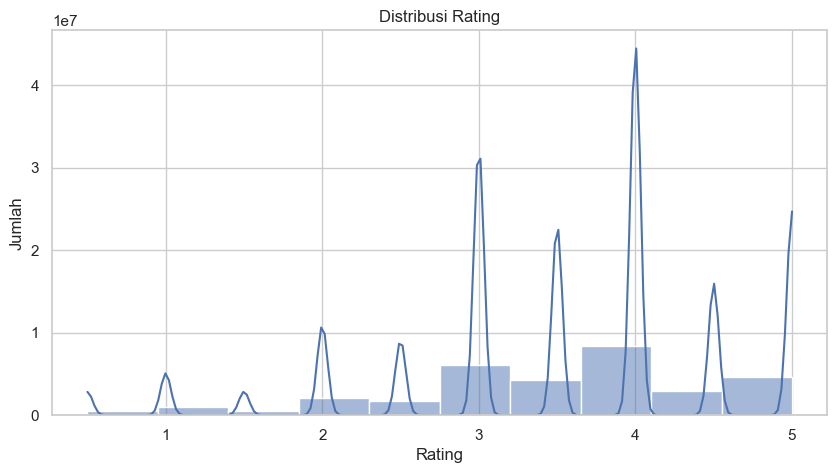

In [14]:
plt.figure()
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()

### Hasil Interpretasi

1. **Distribusi Tidak Merata**:
   - Data rating tidak tersebar secara merata di seluruh rentang nilai.
   - Rating cenderung **terkonsentrasi di angka-angka tertentu**.

2. **Puncak Distribusi**:
   - Terdapat puncak (peak) paling tinggi di sekitar **rating 4**, yang mengindikasikan bahwa **rating 4 adalah yang paling umum** diberikan oleh pengguna.
   - Selain itu, rating **3 dan 5** juga cukup sering muncul.

3. **Rating Rendah Jarang Diberikan**:
   - Rating antara **0 hingga 2** memiliki frekuensi yang jauh lebih rendah, artinya hanya sedikit pengguna yang memberikan nilai rendah.

4. **Distribusi Multimodal**:
   - Terdapat beberapa puncak dalam kurva KDE, yang menunjukkan **banyaknya nilai rating yang sering diberikan secara spesifik** (misalnya: 3.0, 4.0, 5.0).
   - Ini mengindikasikan kecenderungan pengguna untuk memilih angka bulat.

5. **KDE Terlihat Tajam dan Berfluktuasi**:
   - Kurva KDE sangat fluktuatif (tajam dan bergerigi), yang kemungkinan besar disebabkan oleh:
     - **Jumlah data yang sangat besar**
     - **Bandwidth KDE yang terlalu kecil**
   - Hal ini bisa dikoreksi dengan menyesuaikan parameter `bw_adjust` pada fungsi KDE agar grafik terlihat lebih halus dan representatif.

---

### Kesimpulan
Grafik distribusi rating menunjukkan bahwa sebagian besar pengguna memberikan rating tinggi (khususnya 4), sementara hanya sebagian kecil yang memberikan rating rendah. Ini bisa menjadi indikator positif terhadap kualitas produk atau layanan yang dinilai.

## **Film dengan Rating Terbanyak**

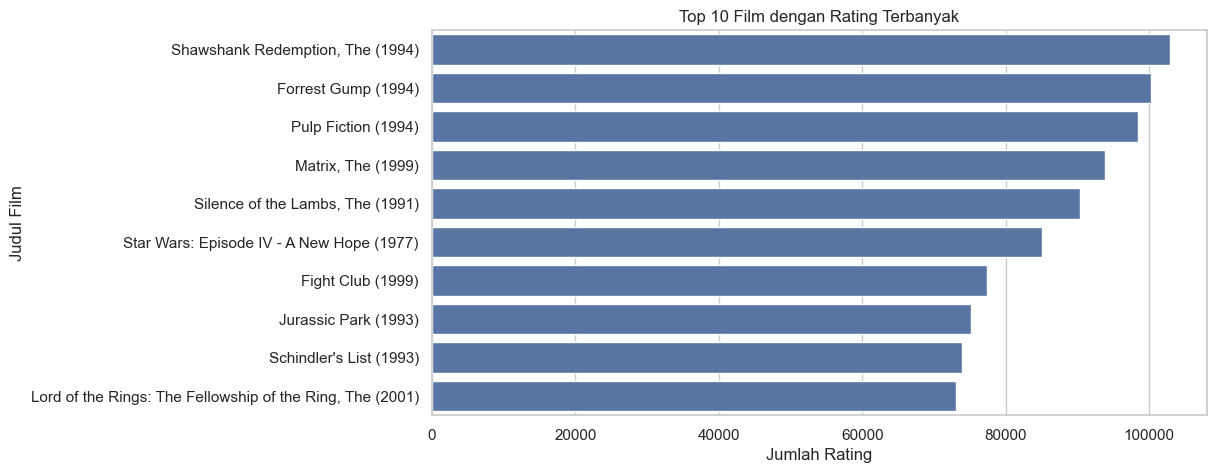

In [15]:
top_movies_by_rating = ratings['movieId'].value_counts().head(10)
top_movie_ids = top_movies_by_rating.index
top_movie_titles = movies[movies['movieId'].isin(top_movie_ids)]

plt.figure()
sns.barplot(
    x=top_movies_by_rating.values,
    y=top_movie_titles.set_index('movieId').loc[top_movie_ids]['title']
)
plt.title("Top 10 Film dengan Rating Terbanyak")
plt.xlabel("Jumlah Rating")
plt.ylabel("Judul Film")
plt.show()

### Hasil Interpretasi

1. **Film dengan Rating Terbanyak**:
   - **The Shawshank Redemption (1994)** menempati posisi pertama dengan jumlah rating tertinggi, sedikit di atas 100.000 rating.
   - Film ini sering dianggap sebagai salah satu film terbaik sepanjang masa, yang sejalan dengan tingginya jumlah rating.

2. **Film Lain dengan Jumlah Rating Tinggi**:
   - **Forrest Gump (1994)** dan **Pulp Fiction (1994)** menyusul di posisi kedua dan ketiga, dengan jumlah rating yang sangat dekat.
   - Film-film ini juga tergolong klasik dan populer secara global.

3. **Dominasi Film Tahun 1990-an**:
   - Mayoritas film dalam daftar dirilis pada **dekade 1990-an**, menunjukkan bahwa film-film dari periode tersebut masih sangat populer dan relevan bagi banyak penonton hingga kini.
   - Hanya satu film dari dekade 2000-an, yaitu **The Lord of the Rings: The Fellowship of the Ring (2001)**, yang masuk dalam daftar.

4. **Keberagaman Genre**:
   - Daftar ini mencakup berbagai genre seperti drama (**Shawshank Redemption**), aksi (**Matrix**, **Fight Club**), sci-fi (**Star Wars**), hingga thriller psikologis (**Silence of the Lambs**), menunjukkan bahwa popularitas tidak terbatas pada satu genre tertentu.

---

### Kesimpulan
Grafik ini mengungkap bahwa film klasik dan berkualitas dari tahun 1990-an mendominasi dalam hal jumlah rating yang diberikan pengguna. Jumlah rating yang tinggi ini bisa menjadi indikator bahwa film-film tersebut banyak ditonton, dikenang, dan dinilai ulang oleh generasi penonton yang berbeda.

## **Genre Terbanyak**

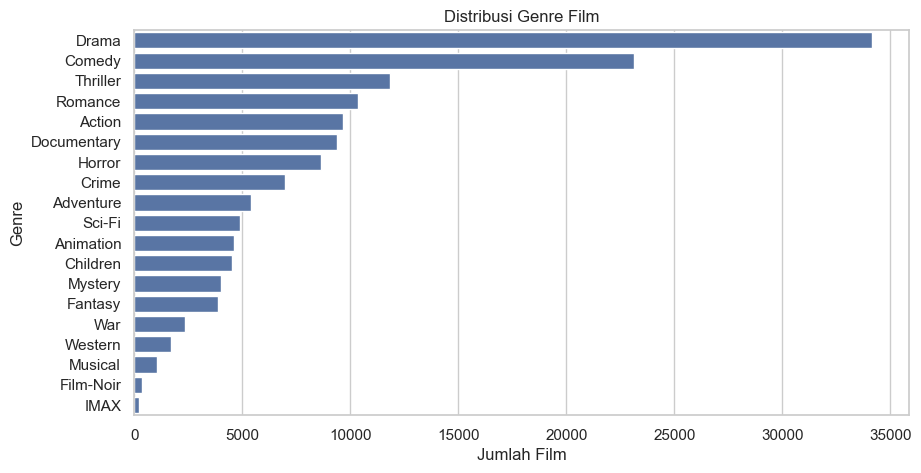

In [16]:
genre_lists = movies['genres'].str.split('|')
genre_flat = [genre for sublist in genre_lists for genre in sublist if genre != '(no genres listed)']
genre_counts = Counter(genre_flat)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Jumlah'])
genre_df = genre_df.sort_values(by='Jumlah', ascending=False)

plt.figure()
sns.barplot(data=genre_df, x='Jumlah', y='Genre')
plt.title("Distribusi Genre Film")
plt.xlabel("Jumlah Film")
plt.ylabel("Genre")
plt.show()

### Hasil Interpretasi

1. **Genre Terpopuler**:
   - **Drama** merupakan genre dengan jumlah film terbanyak, yaitu mendekati **34.000 film**.
   - Diikuti oleh **Comedy** (~24.000 film) dan **Thriller** (~22.000 film).
   - Ini menunjukkan bahwa genre drama, komedi, dan thriller mendominasi produksi film secara umum.

2. **Genre Menengah**:
   - Genre seperti **Romance**, **Action**, **Documentary**, dan **Horror** memiliki jumlah film yang cukup besar, berkisar antara **8.000–11.000** film.
   - Menunjukkan bahwa tema cinta, aksi, dan dokumenter juga cukup banyak diminati dan diproduksi.

3. **Genre Kurang Umum**:
   - Genre seperti **Western**, **Musical**, **Film-Noir**, dan **IMAX** memiliki jumlah film yang jauh lebih sedikit dibanding genre lainnya.
   - **IMAX** menjadi genre dengan jumlah film paling sedikit, menunjukkan bahwa film dengan format khusus ini lebih jarang diproduksi.

4. **Keberagaman Genre**:
   - Terdapat lebih dari 15 genre yang berbeda, mencerminkan bahwa industri film menawarkan pilihan yang sangat beragam untuk berbagai selera dan usia.

---

### Kesimpulan
Distribusi ini menunjukkan bahwa **Drama** adalah genre paling dominan dalam industri film, diikuti oleh **Comedy** dan **Thriller**. Sementara itu, genre-genre seperti **IMAX** dan **Film-Noir** relatif jarang. Informasi ini dapat digunakan untuk memahami tren preferensi produksi film dan potensi pasar dalam industri perfilman.

## **Tag yang Paling Sering Digunakan**

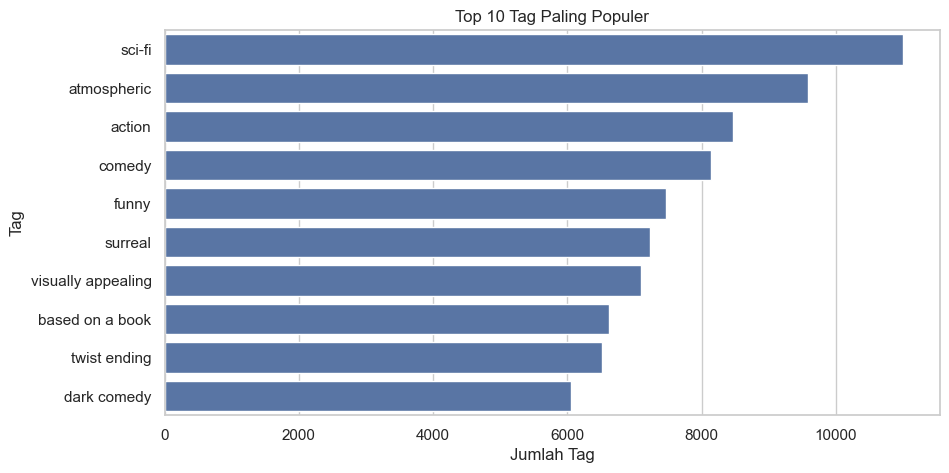

In [17]:
tag_counts = tags['tag'].value_counts().head(10)

plt.figure()
sns.barplot(x=tag_counts.values, y=tag_counts.index)
plt.title("Top 10 Tag Paling Populer")
plt.xlabel("Jumlah Tag")
plt.ylabel("Tag")
plt.show()

### Hasil Interpretasi

1. **Tag Terpopuler**:
   - Tag **"sci-fi"** menjadi yang paling sering digunakan, dengan jumlah melebihi **11.000 kemunculan**, menunjukkan bahwa genre fiksi ilmiah sangat populer di kalangan penonton atau pencatat metadata.

2. **Tag Umum Lainnya**:
   - Tag **"atmospheric"**, **"action"**, dan **"comedy"** juga termasuk yang paling banyak digunakan, menunjukkan bahwa elemen suasana, aksi, dan komedi adalah daya tarik utama dalam film.

3. **Unsur Cerita & Visual**:
   - Tag seperti **"twist ending"**, **"visually appealing"**, dan **"based on a book"** menunjukkan bahwa **alur cerita yang mengejutkan**, **visual yang menarik**, dan **adaptasi dari buku** juga merupakan faktor yang diapresiasi penonton.

4. **Kecenderungan Genre & Nuansa**:
   - Adanya tag seperti **"dark comedy"**, **"surreal"**, dan **"funny"** menunjukkan minat penonton terhadap film dengan nuansa tertentu, baik itu **humor gelap** maupun **pengalaman sinematik yang tidak biasa (surealis)**.

---

### Kesimpulan
Tag-tag paling populer mencerminkan **preferensi audiens terhadap genre dan elemen naratif tertentu**, dengan fiksi ilmiah, atmosfer kuat, aksi, dan komedi menjadi daya tarik utama. Selain itu, aspek visual dan struktur cerita yang unik juga memainkan peran penting dalam persepsi dan klasifikasi film.


# **Data Preprocessing**

## **Pisahkan Genre**

In [18]:
# Buat kolom baru: list of genre
movies['genre_list'] = movies['genres'].apply(lambda x: x.split('|') if x != '(no genres listed)' else [])

Kode ini melakukan transformasi data pada DataFrame `movies` dengan:

1. **Membuat kolom baru** bernama `'genre_list'`
2. **Mengisi kolom tersebut** dengan:
   - Daftar genre yang dipisahkan dari string asli (kolom `'genres'`) menggunakan `split('|')`
   - Jika genre adalah `'(no genres listed)'`, diisi dengan list kosong `[]`

**Contoh Transformasi**:
- Input: `"Action|Adventure|Sci-Fi"`  
  Output: `["Action", "Adventure", "Sci-Fi"]`
- Input: `"(no genres listed)"`  
  Output: `[]`

**Fungsi Utama**:
- Mengubah format genre dari string tunggal menjadi list terpisah
- Mempermudah analisis/operasi berbasis genre individual

## **Gabungkan Semua Tag Per Movie**

In [19]:
# Ubah tag ke lowercase dan hapus NaN
tags['tag'] = tags['tag'].astype(str).str.lower()
tags_clean = tags.dropna(subset=['tag'])

In [20]:
# Gabungkan semua tag per film jadi 1 string (untuk konten deskripsi)
tags_grouped = tags_clean.groupby('movieId')['tag'].apply(lambda x: ' '.join(set(x))).reset_index()
tags_grouped.columns = ['movieId', 'tags_combined']

Kode ini melakukan penggabungan (aggregasi) tag untuk setiap film dengan cara:

1. **Group by movieId**  
   - Mengelompokkan data berdasarkan `movieId` (ID film unik)

2. **Gabungkan tag**  
   - Menggunakan `lambda x: ' '.join(set(x))` untuk:  
     a. `set(x)` - Menghapus duplikat tag  
     b. `' '.join()` - Menggabungkan tag unik menjadi satu string dipisahkan spasi

3. **Hasil akhir**  
   - Dataframe baru `tags_grouped` dengan kolom:  
     - `movieId` (ID film)  
     - `tags_combined` (string gabungan semua tag unik untuk film tersebut)

## **Gabungkan dengan Dataset Movie**

In [21]:
movies_merged = pd.merge(movies, tags_grouped, on='movieId', how='left')
movies_merged['tags_combined'] = movies_merged['tags_combined'].fillna('')

Kode ini melakukan penggabungan (merge) dua DataFrame dengan langkah:

1. **Merge Data**  
   - Menggabungkan `movies` dan `tags_grouped` berdasarkan kolom `movieId`  
   - `how='left'` artinya semua data dari `movies` dipertahankan (left join)  
   - Tag hanya akan ditambahkan jika `movieId` ada di kedua tabel

2. **Handle Missing Values**  
   - `fillna('')` mengubah nilai kosong/NULL di kolom `tags_combined` menjadi string kosong  
   - Memastikan tidak ada nilai NaN yang mengganggu operasi berikutnya

## **Buat Kolom 'combined_features' untuk Content-Based**

In [22]:
# Gabungkan title + genres + tags jadi satu kolom untuk fitur konten
movies_merged['genre_str'] = movies_merged['genre_list'].apply(lambda x: ' '.join(x))
movies_merged['combined_features'] = movies_merged['title'].str.lower() + ' ' + \
                                     movies_merged['genre_str'].str.lower() + ' ' + \
                                     movies_merged['tags_combined']

Kode ini menggabungkan beberapa fitur teks dari dataset film menjadi satu kolom:

1. **Membuat string genre**  
   `movies_merged['genre_str'] = movies_merged['genre_list'].apply(lambda x: ' '.join(x))`  
   - Mengubah list genre menjadi string tunggal dipisahkan spasi

2. **Menggabungkan semua fitur**  
   `movies_merged['combined_features']` dibuat dengan menggabungkan:  
   - Judul film (dikonversi lowercase)  
   - String genre (lowercase)  
   - Tag yang sudah digabungkan  
   - Dipisahkan oleh spasi

## **Gabungkan rating rata-rata film**

In [23]:
# Ambil rata-rata rating per film
rating_mean = ratings.groupby('movieId')['rating'].mean().reset_index()
rating_mean.columns = ['movieId', 'average_rating']

In [24]:
movies_final = pd.merge(movies_merged, rating_mean, on='movieId', how='left')

In [25]:
print("Contoh data hasil preprocessing:")
print(movies_final[['movieId', 'title', 'genres', 'genre_list', 'tags_combined', 'combined_features', 'average_rating']].head())

Contoh data hasil preprocessing:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                          genre_list  \
0  [Adventure, Animation, Children, Comedy, Fantasy]   
1                     [Adventure, Children, Fantasy]   
2                                  [Comedy, Romance]   
3                           [Comedy, Drama, Romance]   
4                                           [Comedy]   

                            

# **Data Preparation**

## **TF-IDF Vectorization**

In [26]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_final['combined_features'])

print(f"Bentuk TF-IDF matrix: {tfidf_matrix.shape}")


Bentuk TF-IDF matrix: (87585, 71417)


## **Hitung Cosine Similarity**

In [27]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### Penjelasan Kode:

1. **`TfidfVectorizer(stop_words='english')`**  
   Membuat objek untuk mengubah teks menjadi representasi numerik menggunakan metode **TF-IDF**.  
   - TF-IDF = Term Frequency - Inverse Document Frequency  
   - `stop_words='english'` secara otomatis menghapus kata-kata umum (seperti *the*, *and*, *is*) agar tidak mempengaruhi bobot fitur.

2. **`fit_transform(movies_final['combined_features'])`**  
   Menerapkan TF-IDF pada kolom `combined_features`, yang berisi gabungan informasi teks dari judul, genre, dan tag setiap film.  
   Hasilnya adalah **matriks sparse** berukuran besar yang merepresentasikan setiap film sebagai vektor fitur berbasis kata.

3. **`tfidf_matrix.shape`**  
   Menampilkan dimensi matriks TF-IDF.

---

### Output:
```
Bentuk TF-IDF matrix: (87585, 71417)
```

Artinya:
- Terdapat **87.585 film** (baris)
- Terdapat **71.417 kata unik** (fitur) yang digunakan untuk merepresentasikan konten film


## **Index Mapping**

In [28]:
indices = pd.Series(movies_final.index, index=movies_final['title'].str.lower()).drop_duplicates()
movieId_to_index = pd.Series(movies_final.index, index=movies_final['movieId'])

### Tujuan:
- Struktur ini sangat berguna untuk **mengakses data film dengan cepat**, baik berdasarkan judul maupun `movieId`.
- Digunakan terutama saat membuat fungsi sistem rekomendasi seperti:
  - Mencari indeks film berdasarkan input pengguna (judul atau ID)
  - Mengambil baris vektor TF-IDF tertentu dari `tfidf_matrix`
  - Membangun daftar film mirip dari indeks yang diketahui

# **Model Development: Content-Based Filtering**

## **Rekomendasi Film Berdasarkan Judul**

In [29]:
def recommend_movies(title, num_recommendations=10):
    title = title.lower()
    if title not in indices:
        return f"Film '{title}' tidak ditemukan."

    idx = indices[title]
    distances, indices_similar = model_knn.kneighbors(tfidf_matrix[idx], n_neighbors=num_recommendations + 1)

    recommended_indices = indices_similar.flatten()[1:]  
    return movies_final.iloc[recommended_indices][['title', 'genres', 'average_rating']]

### Penjelasan Fungsi:

Fungsi ini digunakan untuk memberikan **rekomendasi film serupa** berdasarkan **judul film input** yang diberikan pengguna.

---

### Langkah-langkah:

1. **`title = title.lower()`**  
   Mengubah input judul film menjadi huruf kecil untuk memastikan pencarian tidak sensitif terhadap kapitalisasi.

2. **Cek apakah judul film ada dalam `indices`**  
   Jika tidak ditemukan, fungsi mengembalikan pesan error:
   ```
   Film 'judul' tidak ditemukan.
   ```

3. **Ambil indeks film dari `indices`**  
   Digunakan untuk mengakses baris film dalam TF-IDF matrix:
   ```python
   idx = indices[title]
   ```

4. **Hitung kemiripan menggunakan KNN (K-Nearest Neighbors)**  
   Model `model_knn` akan mencari film paling mirip berdasarkan vektor TF-IDF:
   ```python
   distances, indices_similar = model_knn.kneighbors(tfidf_matrix[idx], n_neighbors=num_recommendations + 1)
   ```

5. **Ambil indeks rekomendasi (tanpa film itu sendiri)**  
   Elemen pertama adalah film input itu sendiri, jadi di-skip:
   ```python
   recommended_indices = indices_similar.flatten()[1:]
   ```

6. **Kembalikan hasil rekomendasi**  
   Menampilkan judul, genre, dan rata-rata rating dari film-film yang direkomendasikan:
   ```python
   return movies_final.iloc[recommended_indices][['title', 'genres', 'average_rating']]
   ```

---

### Tujuan:
Memberikan **daftar film serupa** berdasarkan isi konten (judul, genre, tag, dll) dengan pendekatan **content-based filtering** menggunakan **TF-IDF + KNN**.


## **Contoh Penggunaan**

In [30]:
print("Rekomendasi film mirip dengan 'Toy Story (1995)':")
print(recommend_movies("Toy Story (1995)"))

Rekomendasi film mirip dengan 'Toy Story (1995)':
                                           title  \
3021                          Toy Story 2 (1999)   
60708                         Toy Story 4 (2019)   
14815                         Toy Story 3 (2010)   
24090          Toy Story That Time Forgot (2014)   
22647          Toy Story Toons: Small Fry (2011)   
24088    Toy Story Toons: Partysaurus Rex (2012)   
22646  Toy Story Toons: Hawaiian Vacation (2011)   
33857                         Toy Masters (2014)   
1831                       Small Soldiers (1998)   
73549                           Lamp Life (2020)   

                                                 genres  average_rating  
3021        Adventure|Animation|Children|Comedy|Fantasy        3.812043  
60708               Adventure|Animation|Children|Comedy        3.589044  
14815  Adventure|Animation|Children|Comedy|Fantasy|IMAX        3.827643  
24090                                Animation|Children        3.216617  
22647  

## **Rekomendasi Film Berdasarkan Mood**

In [31]:
def recommend_movies_advanced(title, num_recommendations=10, mood_filter=None):
    title = title.lower()
    if title not in indices:
        return f"Film '{title}' tidak ditemukan dalam dataset."

    idx = indices[title]

    # Ambil 50 film paling mirip dari model NearestNeighbors
    distances, indices_similar = model_knn.kneighbors(tfidf_matrix[idx], n_neighbors=50)
    recommended_indices = indices_similar.flatten()[1:]

    # Ambil film yang relevan
    recommendations = movies_final.iloc[recommended_indices].copy()

    # --- Mapping genre ke mood (versi lengkap) ---
    mood_genre_map = {
        'bahagia': ['Comedy', 'Adventure', 'Animation', 'Family', 'Musical'],
        'romantis': ['Romance'],
        'sedih': ['Drama', 'History', 'War', 'Film-Noir'],
        'tegang': ['Thriller', 'Horror', 'Action', 'Mystery', 'Crime', 'Adventure'],
        'ceria': ['Animation', 'Family', 'Children'],
        'imajinatif': ['Fantasy', 'Sci-Fi'],
        'nyata': ['Documentary'],
        'klasik': ['Western', 'Film-Noir']
    }


    if mood_filter:
        mood_filter = mood_filter.lower()
        if mood_filter in mood_genre_map:
            target_genres = set(mood_genre_map[mood_filter])
            recommendations = recommendations[
                recommendations['genre_list'].apply(lambda genres: any(g in target_genres for g in genres))
            ]
        else:
            print(f"Mood '{mood_filter}' tidak ditemukan. Gunakan salah satu: {list(mood_genre_map.keys())}")

    # Urutkan berdasarkan average rating
    recommendations = recommendations.sort_values(by='average_rating', ascending=False)

    # Kembalikan hasil akhir
    return recommendations[['title', 'genres', 'average_rating']].head(num_recommendations)


### Penjelasan Fungsi:

Fungsi ini digunakan untuk merekomendasikan film yang mirip dengan film input berdasarkan konten, **dengan opsi filter berdasarkan suasana hati (mood)** pengguna.

---

### Langkah-langkah Penjelasan:

1. **Konversi Judul ke Huruf Kecil**
   ```python
   title = title.lower()
   ```
   Untuk memastikan pencocokan judul tidak case-sensitive.

2. **Cek Apakah Judul Ada**
   ```python
   if title not in indices:
       return f"Film '{title}' tidak ditemukan dalam dataset."
   ```
   Mengembalikan pesan jika judul tidak ada di dataset.

3. **Cari Indeks dan Film Serupa**
   ```python
   idx = indices[title]
   distances, indices_similar = model_knn.kneighbors(tfidf_matrix[idx], n_neighbors=50)
   recommended_indices = indices_similar.flatten()[1:]
   ```
   Mengambil **50 film terdekat** (termasuk film itu sendiri, lalu di-skip), berdasarkan vektor TF-IDF dan model KNN.

4. **Ambil Data Film yang Direkomendasikan**
   ```python
   recommendations = movies_final.iloc[recommended_indices].copy()
   ```

5. **Filter Berdasarkan Mood (Opsional)**
   ```python
   mood_genre_map = {
       'bahagia': ['Comedy', 'Adventure', 'Animation', 'Family', 'Musical'],
       'romantis': ['Romance'],
       'sedih': ['Drama', 'History', 'War', 'Film-Noir'],
       'tegang': ['Thriller', 'Horror', 'Action', 'Mystery', 'Crime', 'Adventure'],
       'ceria': ['Animation', 'Family', 'Children'],
       'imajinatif': ['Fantasy', 'Sci-Fi'],
       'nyata': ['Documentary'],
       'klasik': ['Western', 'Film-Noir']
   }
   ```
   Jika `mood_filter` diisi dan cocok dengan salah satu kunci, maka akan:
   - Menyaring hanya film yang memiliki genre sesuai dengan mood.
   - Contoh: mood `'bahagia'` akan memilih film dengan genre `Comedy`, `Adventure`, dll.

6. **Urutkan Berdasarkan Rating**
   ```python
   recommendations = recommendations.sort_values(by='average_rating', ascending=False)
   ```

7. **Kembalikan N Teratas**
   ```python
   return recommendations[['title', 'genres', 'average_rating']].head(num_recommendations)
   ```

---

### Tujuan Fungsi:
- Memberikan rekomendasi film yang **mirip secara konten**.
- Menyesuaikan hasil rekomendasi dengan **suasana hati pengguna**.
- Menyaring dan mengurutkan film berdasarkan **genre yang relevan dan rating tertinggi**.


In [32]:
print(recommend_movies_advanced("Jumanji (1995)", num_recommendations=5, mood_filter="imajinatif"))

                                          title  \
57705  Spider-Man: Into the Spider-Verse (2018)   
1237                  Back to the Future (1985)   
581           Terminator 2: Judgment Day (1991)   
1207                     Terminator, The (1984)   
25097                           Deadpool (2016)   

                                  genres  average_rating  
57705  Action|Adventure|Animation|Sci-Fi        4.185260  
1237             Adventure|Comedy|Sci-Fi        3.969149  
581                        Action|Sci-Fi        3.962045  
1207              Action|Sci-Fi|Thriller        3.902092  
25097     Action|Adventure|Comedy|Sci-Fi        3.850283  


# **Evaluasi**

In [33]:
# Ambil userId yang cukup aktif (banyak rating)
active_users = ratings['userId'].value_counts()
active_users = active_users[active_users >= 20].index.tolist()

def evaluate_precision_at_k(user_id, k=10, threshold=4.0):
    """
    Evaluasi Precision@K untuk 1 user:
    Apakah rekomendasi film mirip (berdasarkan film yang dia sukai) juga memiliki rating tinggi?
    """
    # Ambil film yang disukai user
    user_ratings = ratings[(ratings['userId'] == user_id) & (ratings['rating'] >= threshold)]
    liked_movies = user_ratings['movieId'].tolist()

    if not liked_movies:
        return None

    hit = 0
    total = 0

    for movie_id in liked_movies:
        if movie_id not in movieId_to_index:
            continue
        idx = movieId_to_index[movie_id]
        distances, indices_similar = model_knn.kneighbors(tfidf_matrix[idx], n_neighbors=k+1)
        recommended_movie_ids = movies_final.iloc[indices_similar.flatten()[1:]]['movieId'].tolist()

        # Hit jika film yang disukai juga muncul dalam rekomendasi dari film lain yang disukai
        hits = sum([1 for m in recommended_movie_ids if m in liked_movies and m != movie_id])
        hit += hits
        total += k

    if total == 0:
        return None

    precision_at_k = hit / total
    return precision_at_k

# Evaluasi untuk beberapa user
results = []
for uid in active_users[:30]:  # evaluasi 30 user saja agar cepat
    p_at_k = evaluate_precision_at_k(uid, k=10)
    if p_at_k is not None:
        results.append(p_at_k)

# Rata-rata Precision@10
import numpy as np
average_precision = np.mean(results)

print(f"Rata-rata Precision@10: {average_precision:.4f}")


Rata-rata Precision@10: 0.1408


## Evaluasi Sistem Rekomendasi: Precision@10

### Tujuan Evaluasi:
Mengevaluasi seberapa **relevan rekomendasi film** berdasarkan film yang disukai oleh pengguna.  
Metode yang digunakan adalah **Precision@10**, yaitu proporsi film yang benar-benar disukai (berdasarkan rating pengguna) di antara 10 film yang direkomendasikan.

---

### Langkah Evaluasi:

1. **Filter User Aktif**
   - Hanya pengguna yang memberi **≥ 20 rating** diikutkan dalam evaluasi.
   - Hal ini dilakukan agar hasil evaluasi tidak bias akibat data yang terlalu sedikit.

2. **Fungsi `evaluate_precision_at_k`**
   - Untuk setiap pengguna:
     - Ambil semua film yang dia beri **rating ≥ 4.0** (film yang disukai).
     - Untuk setiap film yang disukai, cari **10 film mirip** menggunakan sistem rekomendasi (TF-IDF + KNN).
     - Hitung berapa banyak dari film yang direkomendasikan juga termasuk film yang disukai oleh user tersebut (selain film asal).
     - Hitung Precision@10:
       \[
       \text{Precision@10} = \frac{\text{Jumlah hits}}{10 \times \text{jumlah film disukai}}
       \]

3. **Evaluasi 30 Pengguna**
   - Precision@10 dihitung untuk **30 user aktif pertama**.

---

### Hasil Akhir:

```python
Rata-rata Precision@10: 0.1408
```

- Artinya, **sekitar 14.08%** dari film yang direkomendasikan untuk setiap pengguna benar-benar termasuk dalam daftar film yang mereka sukai.
- Ini merupakan hasil awal yang **lumayan baik untuk sistem content-based sederhana**, namun tentu masih dapat ditingkatkan (misalnya dengan personalisasi, hybrid model, atau collaborative filtering).

---

### Kesimpulan:

- **Content-based filtering** seperti ini **masih terbatas** dalam memahami selera pengguna secara menyeluruh karena hanya melihat kesamaan antar film.
- Precision@10 sebesar **0.1408** menunjukkan bahwa dari 10 film yang direkomendasikan, rata-rata **hanya 1–2 film yang benar-benar disukai** oleh user.
- Sistem ini bisa dijadikan dasar yang kuat, tetapi untuk **peningkatan kualitas rekomendasi**, perlu integrasi teknik tambahan seperti:
  - Collaborative Filtering
  - Rekomendasi berbasis histori user
  - Feedback loop dari pengguna

